In [1]:
import os
import re
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import h5py

from wombat.utils import listfiles

In [ ]:
run_dir = '../analysis/brca_dcis/combined_run_1'

In [2]:
fp = os.path.join(run_dir, 'output.h5'
f = h5py.File(fp, 'r')

In [3]:
f.keys()

<KeysViewHDF5 ['hyperparameters', 'latent_states', 'parameters', 'progress']>

In [4]:
iteration = list(f['parameters']['M'].keys())[-1]
f['parameters']['M'][iteration]

<HDF5 dataset "40": shape (11381, 20), type "<f8">

In [8]:
f['hyperparameters']

<HDF5 group "/hyperparameters" (5 members)>

In [9]:
iteration

'40'

In [10]:
metagenes = np.asarray(f['parameters']['M'][iteration])
fov_to_emb = {}
for k in f['latent_states']['XT'].keys():
    fov_to_emb[k] = np.asarray(f['latent_states']['XT'][k][iteration])

In [12]:
gene_table = pd.read_csv(os.path.join(run_dir, 'inputs', 'files', 'genes_0.txt',
                         sep='\t', header=None, index_col=0)
gene_table.index.name = 'gene'
metagene_df = pd.DataFrame(data=metagenes, index=gene_table.index,
                         columns=[f'metagene_{i}'for i in range(metagenes.shape[1])])
metagene_df

,metagene_0,metagene_1,metagene_2,metagene_3,metagene_4,metagene_5,metagene_6,metagene_7,metagene_8,metagene_9,metagene_10,metagene_11,metagene_12,metagene_13,metagene_14,metagene_15,metagene_16,metagene_17,metagene_18,metagene_19
gene,,,,,,,,,,,,,,,,,,,,
SAMD11,3.498414e-05,6.603573e-15,3.583134e-05,5.930745e-14,9.347413e-05,0.000001,0.000027,0.000123,1.542583e-05,2.537199e-04,1.897751e-05,1.195643e-14,5.853778e-15,9.249736e-15,2.732495e-14,2.137355e-05,3.927743e-05,2.348010e-05,2.239559e-14,1.819429e-14
NOC2L,1.590350e-14,5.747801e-05,1.675127e-05,1.967018e-04,5.435160e-04,0.000137,0.000145,0.000122,1.602673e-04,1.178970e-04,7.580056e-05,3.977717e-14,1.268322e-04,2.296873e-06,2.470021e-14,2.414880e-04,1.185722e-04,4.627504e-05,2.376567e-04,9.212019e-05
KLHL17,3.697742e-14,1.791983e-13,1.205443e-06,3.993761e-05,2.106170e-04,0.000068,0.000047,0.000020,7.678789e-15,7.140335e-05,6.720705e-05,2.569150e-14,2.731678e-05,1.867966e-05,2.862703e-13,3.289284e-06,1.874768e-14,1.319404e-05,2.576410e-05,7.961583e-14
PLEKHN1,2.419540e-14,5.930440e-07,3.035544e-05,7.837819e-14,3.012494e-05,0.000025,0.000018,0.000023,3.115692e-05,5.729554e-05,2.358206e-06,3.239775e-14,3.983293e-06,3.223137e-14,8.673357e-14,2.054828e-05,2.407233e-05,1.259136e-14,2.329623e-13,2.459780e-14
HES4,9.057238e-15,5.429125e-15,8.798084e-05,2.121180e-06,7.713865e-04,0.000231,0.000144,0.000097,1.654621e-04,4.831054e-04,2.542472e-15,1.001595e-14,9.700181e-05,4.887288e-05,1.680673e-14,6.374026e-04,1.340565e-04,2.176591e-04,2.737339e-04,7.411866e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CMC4,3.126043e-14,5.273826e-05,5.687098e-05,3.989893e-05,1.696853e-14,0.000089,0.000077,0.000022,6.134480e-05,3.375227e-05,7.194631e-05,5.618469e-14,2.634222e-05,2.023238e-05,2.231970e-05,7.690738e-14,4.100273e-05,4.249872e-05,6.147177e-05,4.370540e-12
VBP1,1.870842e-14,8.097228e-05,3.689529e-05,9.033889e-05,1.035688e-14,0.000134,0.000169,0.000050,7.495014e-05,6.955018e-05,9.388411e-05,3.524931e-14,7.751377e-05,6.855694e-05,8.295552e-14,1.034165e-14,8.656935e-05,5.653088e-05,1.550669e-04,3.919571e-14
CLIC2,1.816416e-13,8.403032e-15,9.198275e-05,7.319233e-12,1.045384e-13,0.000014,0.000014,0.000011,1.565465e-05,1.121444e-05,1.422559e-04,1.168691e-04,1.151745e-05,2.557400e-05,2.928512e-06,6.524922e-06,6.644937e-06,5.816601e-05,2.635459e-14,1.493964e-04


In [15]:
fps = sorted(listfiles(os.path.join(run_dir, 'inputs', 'input_adatas'))
fps

['../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U1.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U2.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U3.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U4.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U5.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT308B1-S1H1.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT308B1-S1H4.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT308B1-S1H5.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT308B1-S2H5.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT323B1-S1H1.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT323B1-S1H3.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT339B1-S1H3_U1.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_ad

In [16]:
sample_to_adata = {fp.split('/')[-1].split('.')[0]:sc.read_h5ad(fp)
                   for fp in fps}
sample_to_adata.keys()

dict_keys(['BR_206B1_U1', 'BR_206B1_U2', 'BR_206B1_U3', 'BR_206B1_U4', 'BR_206B1_U5', 'HT308B1-S1H1', 'HT308B1-S1H4', 'HT308B1-S1H5', 'HT308B1-S2H5', 'HT323B1-S1H1', 'HT323B1-S1H3', 'HT339B1-S1H3_U1', 'HT339B1-S1H3_U2', 'HT397B1-S1H2Fs4U1Bp1', 'HT397B1-S1H3Fs1U1Bp1', 'HT480B1-S1H1Fs1U1Bp1', 'HT480B1-S1H3Fs1U1Bp1', 'HT486B1-S1H1Fs1U1Bp1'])

In [17]:
directory = os.path.join(run_dir, 'result_adatas')
Path(directory).mkdir(parents=True, exist_ok=True)
for s, a in sample_to_adata.items():
    fov = str(a.obs['fov'][0])
    a.obsm['metagene_emb'] = fov_to_emb[fov]
    a.uns['metagene_df'] = metagene_df
    
    a.write_h5ad(os.path.join(directory, f'{s}.h5ad'))
    

In [18]:
a = next(iter(sample_to_adata.values()))
a

AnnData object with n_obs × n_vars = 3651 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'sample_id', 'fov', 'highlight'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'highlight_colors', 'spatial', 'spot_to_neighbors', 'metagene_df'
    obsm: 'spatial', 'metagene_emb'

In [19]:
for i in range(a.obsm['metagene_emb'].shape[1]):
    a.obs[f'metagene_{i}'] = a.obsm['metagene_emb'][:, i]

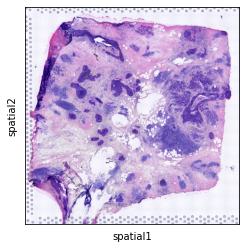

In [20]:
sc.pl.spatial(a)

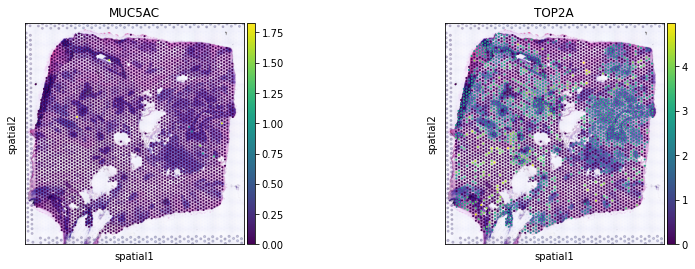

In [21]:
sc.pl.spatial(a, color=['MUC5AC', 'TOP2A'])

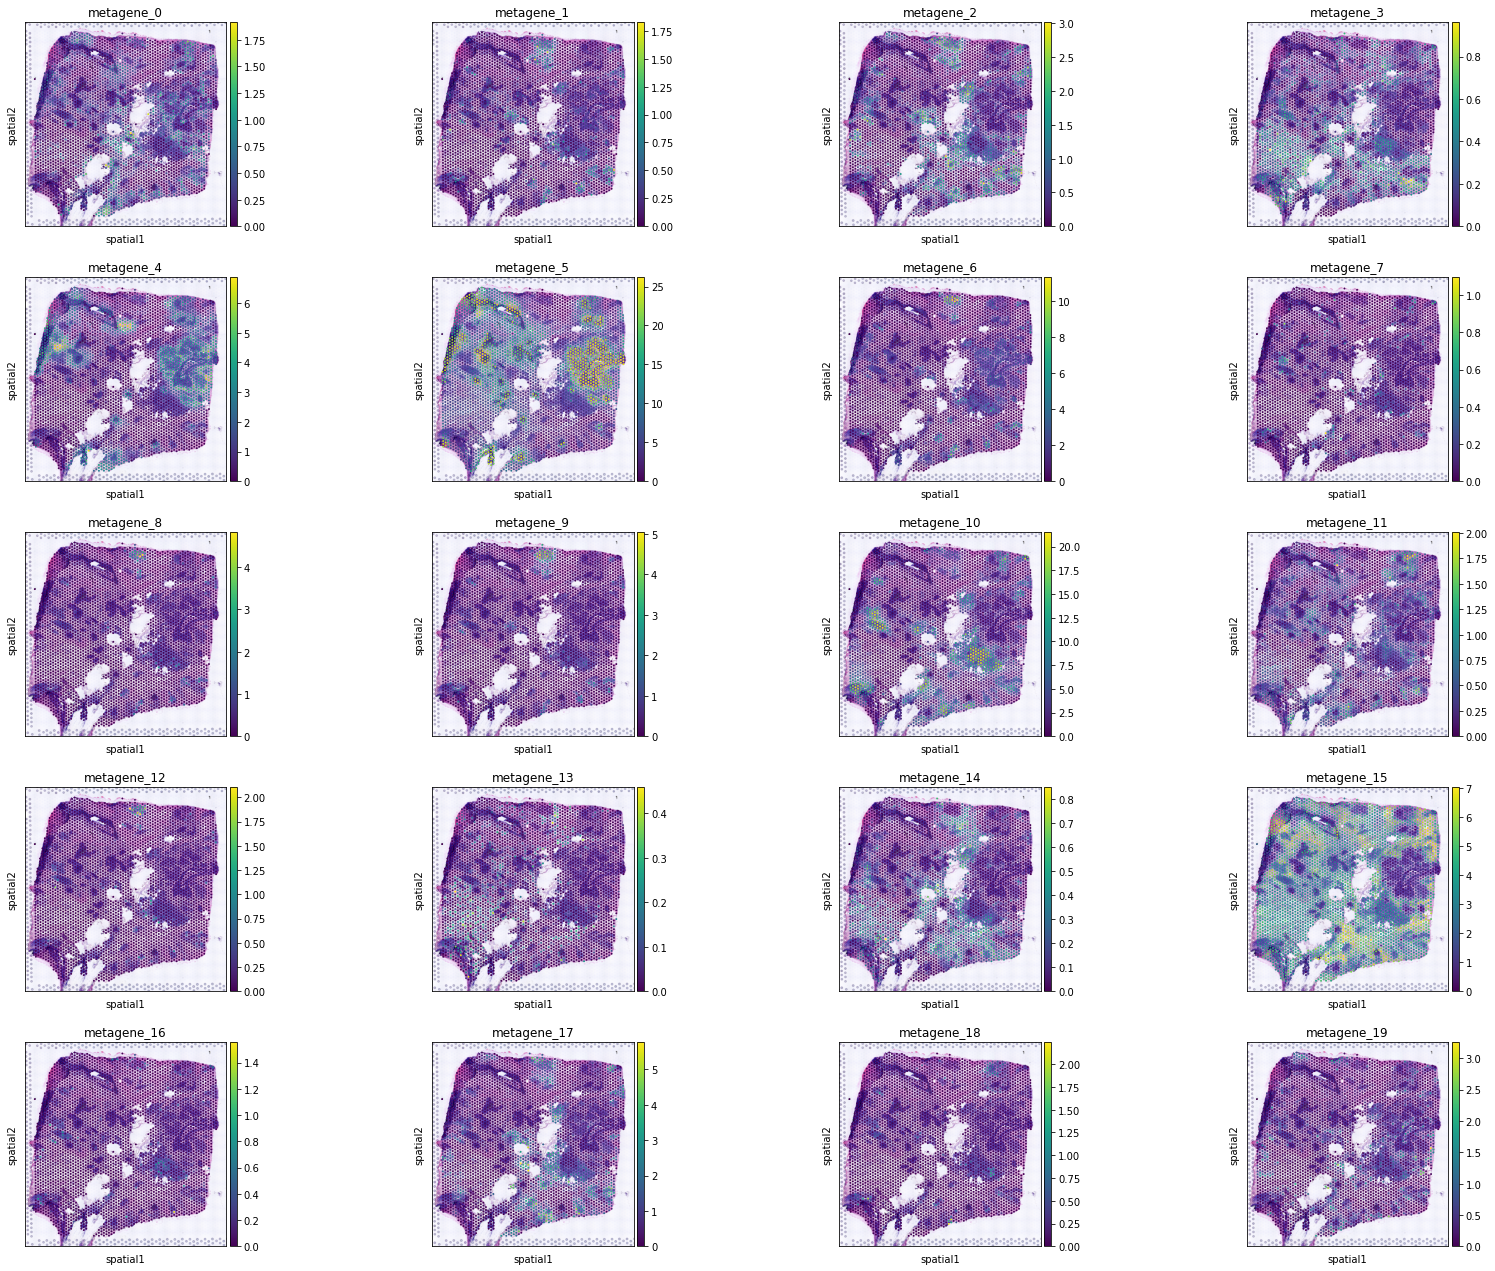

In [22]:
sc.pl.spatial(a, color=[c for c in a.obs.columns if 'metagene' in c])

In [23]:
metagene_df.sort_values('metagene_10', ascending=False)

,metagene_0,metagene_1,metagene_2,metagene_3,metagene_4,metagene_5,metagene_6,metagene_7,metagene_8,metagene_9,metagene_10,metagene_11,metagene_12,metagene_13,metagene_14,metagene_15,metagene_16,metagene_17,metagene_18,metagene_19
gene,,,,,,,,,,,,,,,,,,,,
TRBC2,5.791374e-05,1.816140e-15,2.045021e-04,2.146673e-04,2.868326e-05,9.024977e-06,8.871075e-15,8.294568e-05,1.664475e-05,3.386843e-05,5.931324e-04,1.371511e-03,1.162481e-04,6.020330e-05,5.648038e-04,4.041933e-04,9.512859e-05,1.034965e-14,7.722932e-15,8.858621e-15
TRBC1,2.093514e-14,2.539105e-15,2.874023e-05,1.598645e-04,7.171903e-05,4.666744e-15,1.256404e-14,4.532735e-05,1.582424e-05,7.900630e-15,5.653213e-04,7.273259e-04,7.020036e-05,2.936568e-05,4.508416e-04,4.147755e-04,6.329151e-05,3.050640e-05,1.019502e-05,5.711093e-15
LTB,8.983272e-15,3.220015e-15,3.955419e-05,2.054711e-05,7.315856e-05,1.096502e-15,1.769351e-15,2.842573e-05,3.790627e-05,7.187486e-15,5.614974e-04,1.028366e-04,3.635088e-05,9.258176e-05,3.824219e-04,4.420347e-04,2.872019e-05,1.246005e-15,3.762410e-15,6.383282e-15
CCL19,2.797024e-15,2.584454e-15,1.822962e-04,7.145445e-05,1.321519e-04,8.851127e-15,1.285441e-15,7.980671e-06,2.989442e-05,5.433293e-16,5.604051e-04,1.306814e-14,6.370830e-15,9.378105e-05,2.985241e-04,9.430299e-04,4.297860e-15,3.855729e-06,1.717941e-14,1.631713e-14
CD52,9.560020e-15,1.021151e-15,6.066557e-15,1.069191e-04,1.719172e-04,1.307083e-05,6.129678e-15,1.783210e-05,1.232015e-05,3.654456e-05,5.598167e-04,1.499721e-03,4.712061e-05,1.284633e-05,5.689175e-14,5.911554e-04,8.662128e-06,2.513901e-04,7.386909e-04,5.235586e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRR27,2.495500e-15,1.211595e-15,1.502778e-15,2.618486e-14,1.959177e-15,2.052770e-15,6.784342e-16,1.366025e-15,2.320973e-15,6.349098e-16,5.868021e-16,7.591424e-15,6.727134e-15,5.671128e-15,7.226709e-15,1.176229e-15,1.699054e-15,5.087961e-04,9.625567e-04,2.768760e-15
NR4A1,5.722815e-15,3.620572e-04,8.447132e-06,8.917289e-04,2.104163e-04,2.452961e-04,1.257875e-04,3.175518e-05,8.230590e-05,1.721336e-05,5.845253e-16,2.582286e-14,3.666735e-04,2.130216e-04,1.357775e-14,1.696690e-15,2.255329e-05,1.084105e-03,2.888231e-04,5.270690e-04
CA9,3.369314e-15,4.531859e-15,2.497433e-15,4.011507e-15,3.047855e-04,1.905132e-04,8.660171e-16,1.760905e-15,1.013405e-14,9.883384e-16,5.099702e-16,5.131080e-15,7.534190e-15,6.161381e-15,7.893951e-15,4.519201e-04,3.361721e-15,5.671874e-16,1.844355e-15,4.273826e-15


In [66]:
metagene_df.sort_values('metagene_7', ascending=False)

,metagene_0,metagene_1,metagene_2,metagene_3,metagene_4,metagene_5,metagene_6,metagene_7,metagene_8,metagene_9,metagene_10,metagene_11,metagene_12,metagene_13,metagene_14,metagene_15,metagene_16,metagene_17,metagene_18,metagene_19
gene,,,,,,,,,,,,,,,,,,,,
UBE2C,5.347213e-05,2.048134e-16,1.879784e-04,6.455795e-05,5.036241e-05,2.946056e-05,1.182686e-04,5.738491e-04,9.290591e-16,3.488877e-04,5.266614e-16,6.572769e-15,0.000096,4.053022e-05,3.537119e-16,1.109535e-04,1.632988e-05,5.941735e-16,4.288710e-16,5.784019e-05
DKK1,9.025732e-05,1.486097e-04,1.841917e-04,5.811929e-05,2.372637e-04,5.767551e-04,6.497660e-05,5.577642e-04,1.032553e-15,7.950297e-04,2.732626e-04,1.953362e-15,0.000896,9.051741e-16,1.882648e-04,1.799380e-04,1.063030e-04,1.034198e-03,2.212220e-04,5.803018e-04
GPRC5A,5.080370e-05,1.718839e-04,3.098114e-05,4.063632e-14,9.439358e-04,3.280351e-04,3.378806e-04,4.597039e-04,1.899180e-04,2.608252e-04,1.145549e-04,1.727628e-15,0.000067,6.999273e-05,1.999410e-04,4.249349e-04,1.021843e-04,8.845246e-04,3.348817e-04,1.280527e-04
TOP2A,8.552010e-15,3.600631e-16,1.562214e-04,5.140922e-06,7.013586e-05,2.028101e-06,1.073225e-04,4.403758e-04,1.874841e-16,1.877034e-04,5.335527e-16,4.756514e-06,0.000080,3.207676e-15,8.578190e-16,2.519980e-04,6.474395e-15,4.982979e-16,2.316435e-16,1.067597e-04
LGALS4,8.096291e-16,1.126340e-16,5.298632e-05,3.121504e-04,1.243815e-03,4.101869e-16,7.753661e-04,4.289472e-04,1.110337e-04,4.619360e-16,1.187294e-15,6.852430e-05,0.000059,1.162785e-15,8.641246e-16,2.473178e-16,4.019355e-04,6.830375e-04,2.621046e-04,3.649738e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRRC17,4.691828e-15,2.993633e-04,1.998008e-04,1.334220e-15,1.982766e-16,1.668347e-04,9.173682e-17,1.439137e-16,5.610643e-16,6.889488e-04,2.550832e-04,1.506001e-15,0.000312,2.766028e-05,1.178156e-16,3.839565e-04,1.152345e-14,6.623744e-06,2.118674e-16,4.533815e-04
CHRDL1,4.272196e-06,2.097751e-04,1.844109e-04,2.417357e-15,1.674255e-16,1.958114e-04,1.367550e-16,1.385575e-16,9.897292e-16,4.915685e-04,3.380835e-04,1.611190e-15,0.000362,5.006837e-16,1.226769e-16,1.698340e-04,1.598663e-15,2.391264e-04,1.624177e-16,3.225123e-04
SUCNR1,7.658802e-05,2.372064e-04,2.007670e-04,9.383226e-15,1.697644e-16,5.827980e-04,9.765453e-17,9.681115e-17,1.120826e-15,7.809869e-04,7.315824e-05,3.892298e-05,0.001049,3.814772e-16,1.475039e-16,8.176043e-04,4.023156e-15,2.198216e-15,1.350558e-16,5.757255e-04


In [62]:
metagene_df.sort_values('metagene_18', ascending=False)

,metagene_0,metagene_1,metagene_2,metagene_3,metagene_4,metagene_5,metagene_6,metagene_7,metagene_8,metagene_9,metagene_10,metagene_11,metagene_12,metagene_13,metagene_14,metagene_15,metagene_16,metagene_17,metagene_18,metagene_19
gene,,,,,,,,,,,,,,,,,,,,
RPL17,0.000340,1.181227e-04,4.545362e-04,8.771686e-05,1.832950e-03,1.824190e-03,7.490968e-04,2.526049e-04,3.753802e-04,6.701904e-15,5.850238e-04,0.000516,4.856134e-04,1.531127e-04,3.035095e-04,1.662905e-04,8.071468e-04,2.068085e-15,9.122724e-04,9.780939e-04
GAPDH,0.000360,2.009433e-04,4.831628e-04,6.760827e-15,1.251855e-03,2.338817e-03,4.520594e-04,3.586077e-04,6.842760e-04,1.706424e-04,6.057205e-04,0.000530,7.143428e-04,1.748197e-04,1.161329e-04,8.344308e-05,4.044485e-04,1.094672e-04,8.792629e-04,1.199176e-03
TPT1,0.000313,2.152313e-04,4.778856e-04,5.435467e-05,1.207992e-03,2.099959e-03,5.328579e-04,1.625799e-04,3.203814e-04,1.546641e-15,5.141943e-04,0.000612,6.126995e-04,1.429690e-04,2.429253e-04,1.802920e-04,7.345673e-04,1.458650e-04,8.733417e-04,1.223840e-03
FTH1,0.000343,1.734781e-04,4.551467e-04,3.138318e-04,1.298464e-03,2.192802e-03,6.308199e-04,1.654672e-04,5.180495e-04,2.157857e-15,6.862583e-04,0.000613,6.602544e-04,1.827601e-04,2.452468e-04,1.853395e-05,4.696984e-04,2.406256e-04,8.445949e-04,1.207231e-03
RPS16,0.000325,2.011429e-04,5.986025e-04,4.005265e-15,1.464258e-03,2.568158e-03,6.659476e-04,2.990287e-04,5.851946e-04,4.163719e-15,5.535186e-04,0.000488,6.999599e-04,1.654552e-04,2.302788e-04,1.919863e-04,5.819099e-04,1.482811e-05,8.260053e-04,1.333220e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGP,0.000275,2.862389e-16,1.683722e-04,3.135148e-04,3.080415e-04,2.455907e-04,6.769572e-05,1.727007e-04,1.476172e-04,5.773230e-04,2.749580e-04,0.001071,1.879457e-04,6.753616e-04,4.340942e-15,1.505043e-04,1.671520e-03,6.076419e-05,1.449996e-16,1.683364e-04
SUCNR1,0.000077,2.372064e-04,2.007670e-04,9.383226e-15,1.697644e-16,5.827980e-04,9.765453e-17,9.681115e-17,1.120826e-15,7.809869e-04,7.315824e-05,0.000039,1.048785e-03,3.814772e-16,1.475039e-16,8.176043e-04,4.023156e-15,2.198216e-15,1.350558e-16,5.757255e-04
RARRES1,0.000064,4.410271e-16,7.237597e-05,7.281443e-04,1.750140e-04,5.153115e-16,2.788275e-04,5.643438e-07,2.711947e-16,6.322264e-16,7.970647e-16,0.000058,1.249649e-04,6.848838e-05,2.631198e-04,4.621871e-16,2.167280e-04,3.243797e-04,1.298695e-16,3.028927e-05
